In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [10]:
df=pd.read_csv('AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Unnamed: 7,log return
0,2006-01-03,10.340000,10.678572,10.321428,10.678572,9.227774,201808600,NaN,NaN
1,2006-01-04,10.732857,10.854285,10.642858,10.710000,9.254934,154900900,NaN,0.001276
2,2006-01-05,10.690000,10.700000,10.535714,10.625714,9.182097,112355600,NaN,-0.003431
3,2006-01-06,10.750000,10.957143,10.650000,10.900000,9.419118,176114400,NaN,0.011068
4,2006-01-09,10.961429,11.028571,10.820000,10.864285,9.388256,168760200,NaN,-0.001425


In [11]:
#DF HOLDS THE APPLE STOCK DATA BETWEEN DATES

In [12]:
df["Date"] = pd.to_datetime(df["Date"])


In [13]:
#CSV1 HOLDS ALL DATES BETWEEN JANUARY 1 2010 -> JANUARY 1 2015
csv1=df[(df['Date']>'2010-01-01') &( df['Date']<'2015-01-01')]
csv1.shape

(1258, 9)

In [14]:
#CSV2 HOLDS ALL DATES LOG RETURNS BETWEEN JANUARY 1 2015 -> JANUARY 1 2020
csv2=df[(df['Date']>'2015-01-01') &( df['Date']<'2020-01-01')]
csv2.shape

(1257, 9)

In [15]:
csv1['log return']

1007    0.006708
1008    0.000750
1009   -0.006964
1010   -0.000804
1011    0.002878
          ...   
2260   -0.002050
2261    0.007610
2262   -0.000305
2263   -0.005332
2264   -0.008339
Name: log return, Length: 1258, dtype: float64

In [16]:
csv1

,Date,Open,High,Low,Close,Adj Close,Volume,Unnamed: 7,log return
1007,2010-01-04,30.490000,30.642857,30.340000,30.572857,26.419203,123432400,NaN,0.006708
1008,2010-01-05,30.657143,30.798571,30.464285,30.625713,26.464878,150476200,NaN,0.000750
1009,2010-01-06,30.625713,30.747143,30.107143,30.138571,26.043921,138040000,NaN,-0.006964
1010,2010-01-07,30.250000,30.285715,29.864286,30.082857,25.995777,119282800,NaN,-0.000804
1011,2010-01-08,30.042856,30.285715,29.865715,30.282858,26.168606,111902700,NaN,0.002878
...,...,...,...,...,...,...,...,...,...
2260,2014-12-24,112.580002,112.709999,112.010002,112.010002,102.211563,14479600,NaN,-0.002050
2261,2014-12-26,112.099998,114.519997,112.010002,113.989998,104.018387,33721000,NaN,0.007610
2262,2014-12-29,113.790001,114.769997,113.699997,113.910004,103.945374,27598900,NaN,-0.000305
2263,2014-12-30,113.639999,113.919998,112.110001,112.519997,102.676979,29881500,NaN,-0.005332


In [17]:
#join csv1 with option data.extracting only date,close values
stockdata_merge=csv1[['Date','Close']]
stockdata_merge = stockdata_merge.rename(columns={'Date': 'date'})

stockdata_merge

,date,Close
1007,2010-01-04,30.572857
1008,2010-01-05,30.625713
1009,2010-01-06,30.138571
1010,2010-01-07,30.082857
1011,2010-01-08,30.282858
...,...,...
2260,2014-12-24,112.010002
2261,2014-12-26,113.989998
2262,2014-12-29,113.910004
2263,2014-12-30,112.519997


In [18]:
(csv1['log return']).iloc[-1]

-0.008339368

In [19]:
#RATES HOLD DATA ON THE INTEREST RATES BETWEEN DATES
rates=pd.read_csv('treasury.csv',skiprows=15)


In [20]:
rates['date']=pd.to_datetime(rates["date"])
rates

,date,value
0,1962-01-02,4.06
1,1962-01-03,4.03
2,1962-01-04,3.99
3,1962-01-05,4.02
4,1962-01-08,4.03
...,...,...
15484,2023-11-25,NaN
15485,2023-11-26,NaN
15486,2023-11-27,NaN
15487,2023-11-28,NaN


In [21]:
rates.columns

Index(['date', ' value'], dtype='object')

In [22]:
#getting epsilon and h data from matlab and
import csv
import numpy as np
with open('epsilon.csv', newline='') as csvfile:
    epsilons = list(csv.reader(csvfile))
    epsilons=(np.array(epsilons))
    epsilons=np.squeeze(epsilons)
    epsilons=epsilons.astype('float64')
with open('h.csv', newline='') as csvfile:
    h = list(csv.reader(csvfile))
    h=(np.array(h))
    h=np.squeeze(h)
    h=h.astype('float64')
 

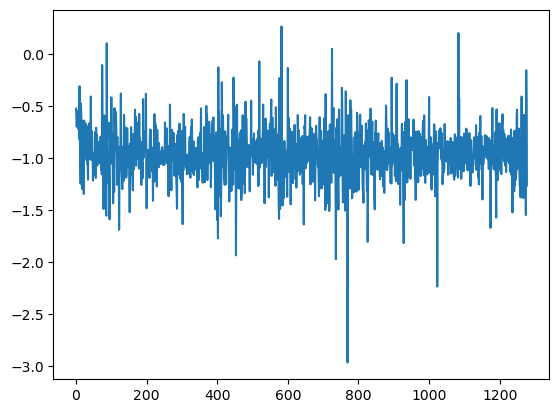

In [23]:
plt.plot(epsilons)

In [24]:
h.max()

0.00734702524631742

In [25]:
len(epsilons)

1278

In [26]:
h=h[1:]
len(h)

1278

In [27]:
rate2010to15=(rates[(rates['date']>'2010-01-01') &( rates['date']<'2015-01-01')])[' value'].mean() #between 2010-2015
rate2010to15


2.5385131894484414

In [28]:
rate2015to20=(rates[(rates['date']>'2015-01-01') &( rates['date']<'2020-01-01')])[' value'].mean() #between 2010-2015
rate2015to20

2.270832728706625

In [29]:
omega,beta,alpha,gamma,lam=(9.99996340e-09, 6.58358926e-01, 9.99999997e-07, 5.48003273e+02, 2.50435690e-08)


In [30]:
#this calculates the epsilons and conditional variances 
import numpy as np

def MLE_obj_trial(x,omega,beta,alpha,gamma,lam):
    n = len(x)
    mu = np.mean(x)
    h0 = np.std(x)
    r0 = 2.58 / 100
    epsilon = np.zeros(n)
    h = np.zeros(n + 1)
    h[0] = h0
    
    for i in range(n):
        epsilon[i] = (x[i] - r0 - lam* h[i]) / np.sqrt(h[i])
        h[i + 1] = omega + beta * h[i] + alpha * (epsilon[i] - gamma* np.sqrt(h[i])) ** 2
    
    
    return epsilon,h

# Example usage:
epsilon_2015to20, h = MLE_obj_trial(np.array(csv2['log return']), omega,beta,alpha,gamma,lam)



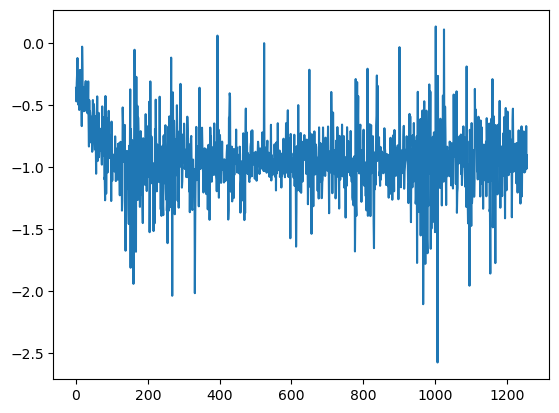

In [31]:
h=h[1:]
plt.plot(epsilon_2015to20)

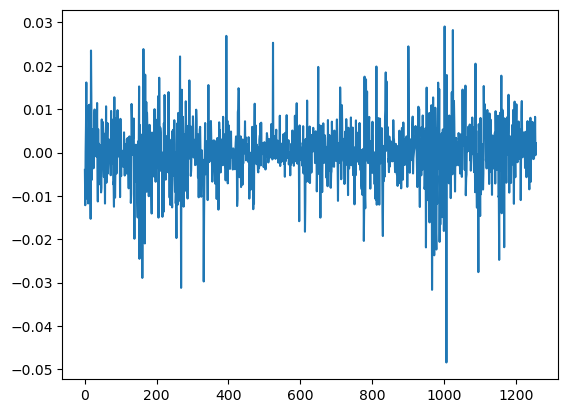

In [32]:

#lam,gamma,alpha,beta,omega=(3.6113780279052063,84.94395907392244,1.5868522446029707e-05, 0.7471325722277569, 2.3333354104363946e-05)
#our validation data
#lam,gamma,alpha,beta,omega=()
x_k=(rate2010to15/100 + (lam*h))+np.sqrt(h)*epsilon_2015to20
plt.plot(x_k)

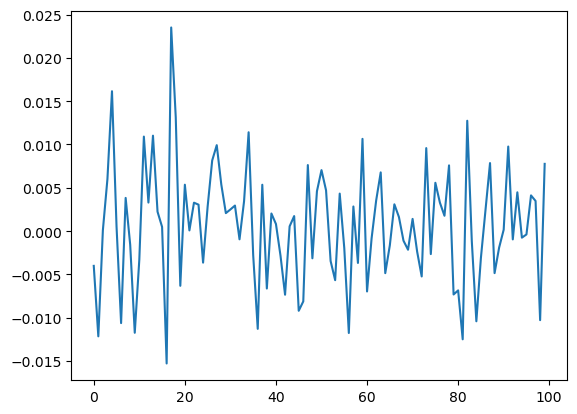

In [33]:
plt.plot(x_k[0:100])


0.0004483588581555281

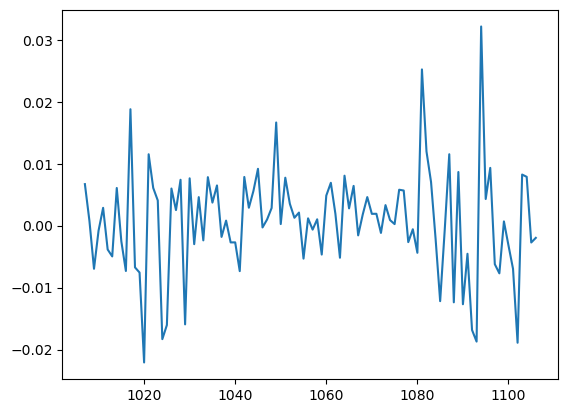

In [34]:
plt.plot((csv1['log return']).iloc[0:100])
diff=x_k[0:1000]-(csv1['log return'].iloc[0:1000])
mae=(np.sum(diff)**2)/1000
mae


In [35]:
#test from data from 2015-20-exporting that data into csv first
csv2['log return']

2265   -0.004151
2266   -0.012410
2267    0.000041
2268    0.006047
2269    0.016374
          ...   
3517    0.007030
3518    0.000413
3519    0.008532
3520   -0.000165
3521    0.002570
Name: log return, Length: 1257, dtype: float64

In [36]:
csv1['log return'][25:50]

1032    0.004607
1033   -0.002375
1034    0.007831
1035    0.003722
1036    0.006497
1037   -0.001819
1038    0.000814
1039   -0.002705
1040   -0.002700
1041   -0.007343
1042    0.007862
1043    0.002891
1044    0.005597
1045    0.009177
1046   -0.000291
1047    0.000997
1048    0.002854
1049    0.016660
1050    0.000258
1051    0.007741
1052    0.003530
1053    0.001273
1054    0.002113
1055   -0.005322
1056    0.001182
Name: log return, dtype: float64

In [37]:
x_k[25:50]

array([ 0.00283306,  0.00815159,  0.00992232,  0.00537765,  0.00207386,
        0.00249713,  0.00294639, -0.00095044,  0.00345623,  0.01140957,
       -0.0027654 , -0.01128664,  0.00535108, -0.00663193,  0.00203138,
        0.0008159 , -0.00284603, -0.00734664,  0.00054756,  0.00173389,
       -0.00920118, -0.00811681,  0.00762306, -0.00314154,  0.00460572])

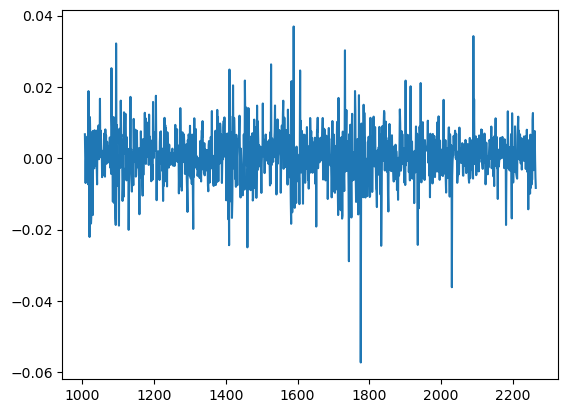

In [38]:
plt.plot(csv1['log return'])

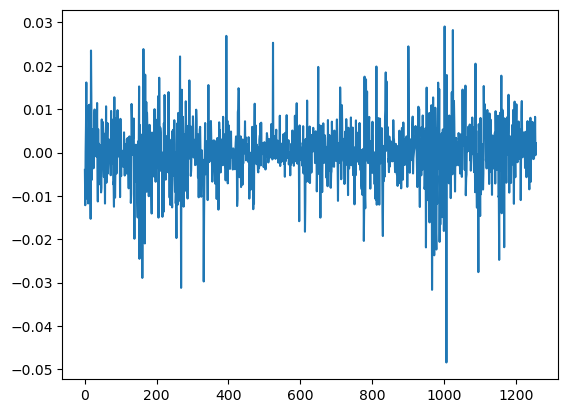

In [39]:
plt.plot(x_k)

In [40]:
(rates[(rates['date']>'2015-01-01') &( rates['date']<'2020-01-01')])[' value'].mean() #between 2015-2020

2.270832728706625

# DATA CLEANING AND DATAFRAMES FOR OPTION DATA

In [41]:
#Oprice is the option prices for apple stock prices
oprice=pd.read_csv('appleoptionprice.csv')
oprice.head()

,secid,date,exdate,cp_flag,strike_price,best_bid,best_offer,volume,impl_volatility,delta,gamma,vega,theta,optionid,forward_price,ticker,index_flag,issuer,exercise_style
0,101594,20010102,20010120,C,27500,0.0000,0.1250,20,1.459423,0.037209,0.017352,0.260497,-4.121465,11830752,NaN,AAPL,0,APPLE INC,A
1,101594,20010102,20010120,C,10000,4.8750,5.1250,20,1.234677,0.949003,0.026450,0.336561,-5.067551,11830738,NaN,AAPL,0,APPLE INC,A
2,101594,20010102,20010120,C,15000,0.9375,1.0000,777,0.785555,0.521397,0.157915,1.278973,-11.232720,11830742,NaN,AAPL,0,APPLE INC,A
3,101594,20010102,20010120,C,20000,0.0625,0.1875,114,0.957491,0.094377,0.054738,0.540283,-5.636965,11830746,NaN,AAPL,0,APPLE INC,A
4,101594,20010102,20010120,C,25000,0.0000,0.0625,103,1.143309,0.024492,0.015663,0.184745,-2.287245,11830750,NaN,AAPL,0,APPLE INC,A


In [42]:
oprice['date'] = pd.to_datetime(oprice['date'], format='%Y%m%d')
oprice['strike_price']=oprice['strike_price']/1000
oprice.head()

,secid,date,exdate,cp_flag,strike_price,best_bid,best_offer,volume,impl_volatility,delta,gamma,vega,theta,optionid,forward_price,ticker,index_flag,issuer,exercise_style
0,101594,2001-01-02,20010120,C,27.5,0.0000,0.1250,20,1.459423,0.037209,0.017352,0.260497,-4.121465,11830752,NaN,AAPL,0,APPLE INC,A
1,101594,2001-01-02,20010120,C,10.0,4.8750,5.1250,20,1.234677,0.949003,0.026450,0.336561,-5.067551,11830738,NaN,AAPL,0,APPLE INC,A
2,101594,2001-01-02,20010120,C,15.0,0.9375,1.0000,777,0.785555,0.521397,0.157915,1.278973,-11.232720,11830742,NaN,AAPL,0,APPLE INC,A
3,101594,2001-01-02,20010120,C,20.0,0.0625,0.1875,114,0.957491,0.094377,0.054738,0.540283,-5.636965,11830746,NaN,AAPL,0,APPLE INC,A
4,101594,2001-01-02,20010120,C,25.0,0.0000,0.0625,103,1.143309,0.024492,0.015663,0.184745,-2.287245,11830750,NaN,AAPL,0,APPLE INC,A


In [43]:
# ouroprice :get data between 2010-15
ouroprice = oprice[(oprice['date'].dt.year > 2009) & (oprice['date'].dt.year < 2015)]


In [44]:
ouroprice=ouroprice[ouroprice['volume']>50]

In [45]:
ouroprice = ouroprice.rename(columns={'date': 'Date'})
rates = rates.rename(columns={'date': 'Date'})


# MERGE TABLE WITH STOCK DATA AND OPTION DATA ON DATE


In [46]:
merged_table = pd.merge(csv1, ouroprice, on='Date')

merged_table.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Unnamed: 7', 'log return', 'secid', 'exdate', 'cp_flag',
       'strike_price', 'best_bid', 'best_offer', 'volume', 'impl_volatility',
       'delta', 'gamma', 'vega', 'theta', 'optionid', 'forward_price',
       'ticker', 'index_flag', 'issuer', 'exercise_style'],
      dtype='object')

In [47]:
merged_table.iloc[:,0:20]

,Date,Open,High,Low,Close,Adj Close,Volume,Unnamed: 7,log return,secid,exdate,cp_flag,strike_price,best_bid,best_offer,volume,impl_volatility,delta,gamma,vega
0,2010-01-04,30.49,30.642857,30.340000,30.572857,26.419203,123432400,NaN,0.006708,101594,20100116,C,310.00,0.00,0.03,51,0.724946,0.001977,0.000233,0.233382
1,2010-01-04,30.49,30.642857,30.340000,30.572857,26.419203,123432400,NaN,0.006708,101594,20100116,C,240.00,0.20,0.21,3810,0.366331,0.038389,0.006127,3.097590
2,2010-01-04,30.49,30.642857,30.340000,30.572857,26.419203,123432400,NaN,0.006708,101594,20100116,C,250.00,0.11,0.13,1741,0.431368,0.020783,0.003124,1.862184
3,2010-01-04,30.49,30.642857,30.340000,30.572857,26.419203,123432400,NaN,0.006708,101594,20100116,C,260.00,0.06,0.08,1711,0.484772,0.011572,0.001682,1.126972
4,2010-01-04,30.49,30.642857,30.340000,30.572857,26.419203,123432400,NaN,0.006708,101594,20100116,C,270.00,0.04,0.06,374,0.542302,0.007727,0.001056,0.792013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505192,2014-12-31,112.82,113.129997,110.209999,110.379997,100.724174,41403400,NaN,-0.008339,101594,20170120,P,60.00,1.72,2.06,86,0.331941,-0.066675,0.002445,20.289970
505193,2014-12-31,112.82,113.129997,110.209999,110.379997,100.724174,41403400,NaN,-0.008339,101594,20170120,P,70.00,3.35,3.70,73,0.320833,-0.114420,0.003774,30.360380
505194,2014-12-31,112.82,113.129997,110.209999,110.379997,100.724174,41403400,NaN,-0.008339,101594,20170120,P,85.00,7.35,7.80,104,0.310044,-0.212872,0.005841,45.360290
505195,2014-12-31,112.82,113.129997,110.209999,110.379997,100.724174,41403400,NaN,-0.008339,101594,20170120,P,90.00,9.30,9.65,364,0.309068,-0.251302,0.006417,49.618430


# CHOOSE A SPECIFIC DATE AND TRY TO CALIBRATE OPTION IMPLIED VOLATILITY ON IT.We choose 2010-01-04

In [48]:
(merged_table[merged_table['Date']=='2010-01-04'])

,Date,Open,High,Low,Close,Adj Close,Volume,Unnamed: 7,log return,secid,...,delta,gamma,vega,theta,optionid,forward_price,ticker,index_flag,issuer,exercise_style
0,2010-01-04,30.49,30.642857,30.34,30.572857,26.419203,123432400,NaN,0.006708,101594,...,0.001977,0.000233,0.233382,-2.808637,33603756,NaN,AAPL,0,APPLE INC,A
1,2010-01-04,30.49,30.642857,30.34,30.572857,26.419203,123432400,NaN,0.006708,101594,...,0.038389,0.006127,3.097590,-18.847420,33848423,NaN,AAPL,0,APPLE INC,A
2,2010-01-04,30.49,30.642857,30.34,30.572857,26.419203,123432400,NaN,0.006708,101594,...,0.020783,0.003124,1.862184,-13.321060,33848436,NaN,AAPL,0,APPLE INC,A
3,2010-01-04,30.49,30.642857,30.34,30.572857,26.419203,123432400,NaN,0.006708,101594,...,0.011572,0.001682,1.126972,-9.059221,33848450,NaN,AAPL,0,APPLE INC,A
4,2010-01-04,30.49,30.642857,30.34,30.572857,26.419203,123432400,NaN,0.006708,101594,...,0.007727,0.001056,0.792013,-7.118690,33848438,NaN,AAPL,0,APPLE INC,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2010-01-04,30.49,30.642857,30.34,30.572857,26.419203,123432400,NaN,0.006708,101594,...,0.222028,0.003959,65.139890,-10.957620,34754308,NaN,AAPL,0,APPLE INC,A
153,2010-01-04,30.49,30.642857,30.34,30.572857,26.419203,123432400,NaN,0.006708,101594,...,0.899751,0.001307,53.789000,-6.998562,34621943,NaN,AAPL,0,APPLE INC,A
154,2010-01-04,30.49,30.642857,30.34,30.572857,26.419203,123432400,NaN,0.006708,101594,...,0.312194,0.003283,108.229400,-10.029710,46545527,NaN,AAPL,0,APPLE INC,A
155,2010-01-04,30.49,30.642857,30.34,30.572857,26.419203,123432400,NaN,0.006708,101594,...,-0.366718,0.003305,114.727800,-9.415285,34659994,NaN,AAPL,0,APPLE INC,A


In [49]:
merged_table=(merged_table[merged_table['Date']=='2010-01-04']).merge(rates,on='Date')[['Date','exdate','Close','strike_price','best_bid','best_offer',' value']]

# FOR 2010-01-04 ,THIS DATAFRAME CONTAINS DATA ON STOCK CLOSING INFO,OPTION INFO AND RATE(value)

In [50]:
merged_table #value is the interest rate
merged_table['exdate'] = pd.to_datetime(merged_table['exdate'], format='%Y%m%d')
merged_table['duration'] = (merged_table['exdate'] - merged_table['Date']).dt.days.astype(int)


In [51]:
merged_table=merged_table.sort_values(by=['strike_price'])

In [52]:
merged_table.head()

,Date,exdate,Close,strike_price,best_bid,best_offer,value,duration
148,2010-01-04,2011-01-22,30.572857,60.0,0.26,0.32,3.85,383
156,2010-01-04,2012-01-21,30.572857,100.0,4.80,5.10,3.85,747
146,2010-01-04,2011-01-22,30.572857,100.0,116.60,117.40,3.85,383
128,2010-01-04,2010-01-16,30.572857,100.0,114.05,114.60,3.85,12
129,2010-01-04,2010-04-17,30.572857,105.0,0.17,0.22,3.85,103


#  NEW


In [53]:
#apple option prices
appleoptiondf=pd.read_csv('APPLE01to20.csv')


In [54]:
appleoptiondf.drop(appleoptiondf[appleoptiondf['volume']<50].index,inplace=True)


In [55]:
appleoptiondf['date'] = pd.to_datetime(appleoptiondf['date'], format='%Y%m%d')
appleoptiondf['exdate'] = pd.to_datetime(appleoptiondf['exdate'], format='%Y%m%d')


In [56]:
appleoptiondf = appleoptiondf[(appleoptiondf['date'].dt.year > 2009) & (appleoptiondf['date'].dt.year < 2015)]
appleoptiondf['duration'] = (appleoptiondf['exdate'] - appleoptiondf['date']).dt.days.astype(int)
appleoptiondf=appleoptiondf[['secid','cp_flag','date','exdate','duration','strike_price','best_bid','best_offer','volume','impl_volatility','ticker','exercise_style']]

In [57]:
appleoptiondf['strike_price']=appleoptiondf['strike_price']/1000

In [58]:
appleoptiondf[appleoptiondf['strike_price']==25]

,secid,cp_flag,date,exdate,duration,strike_price,best_bid,best_offer,volume,impl_volatility,ticker,exercise_style
589064,101594,P,2010-03-05,2011-01-22,323,25.0,0.01,0.07,100,0.824925,AAPL,A
681763,101594,C,2010-11-30,2011-01-22,53,25.0,285.25,288.15,62,NaN,AAPL,A
685459,101594,C,2010-12-07,2011-01-22,46,25.0,292.40,295.30,89,NaN,AAPL,A
687647,101594,C,2010-12-10,2011-01-22,43,25.0,293.90,296.55,250,NaN,AAPL,A
688347,101594,C,2010-12-13,2011-01-22,40,25.0,295.85,298.05,90,NaN,AAPL,A
689047,101594,C,2010-12-14,2011-01-22,39,25.0,294.00,295.45,211,NaN,AAPL,A


In [63]:
merged_appleoptiondf = pd.merge(appleoptiondf, stockdata_merge, on='date')
merged_appleoptiondf[(merged_appleoptiondf['strike_price']<=merged_appleoptiondf['Close']+5) &(merged_appleoptiondf['strike_price']>=merged_appleoptiondf['Close']-5)]

,secid,cp_flag,date,exdate,duration,strike_price,best_bid,best_offer,volume,impl_volatility,ticker,exercise_style,Close
10051,101594,C,2010-04-19,2011-01-22,278,35.0,210.20,212.65,58,NaN,AAPL,A,35.295715
12934,101594,P,2010-05-10,2011-01-22,257,40.0,0.03,0.09,65,0.807181,AAPL,A,36.284286
20733,101594,P,2010-07-20,2011-01-22,186,40.0,0.04,0.08,155,0.945091,AAPL,A,35.984287
23690,101594,P,2010-08-17,2011-01-22,158,35.0,0.01,0.06,100,1.044636,AAPL,A,35.995716
24855,101594,P,2010-08-30,2011-01-22,145,35.0,0.01,0.04,80,1.040956,AAPL,A,34.642857
...,...,...,...,...,...,...,...,...,...,...,...,...,...
511915,101594,C,2014-12-31,2016-01-15,380,115.0,10.85,11.05,769,0.301505,AAPL,A,110.379997
511933,101594,P,2014-12-31,2016-01-15,380,110.0,13.20,13.45,63,0.289645,AAPL,A,110.379997
511934,101594,P,2014-12-31,2016-01-15,380,115.0,16.05,16.30,131,0.286400,AAPL,A,110.379997
511947,101594,C,2014-12-31,2017-01-20,751,110.0,18.90,19.30,775,0.320412,AAPL,A,110.379997


In [64]:
specificdate=merged_appleoptiondf[(merged_appleoptiondf['strike_price']<=merged_appleoptiondf['Close']+5) &(merged_appleoptiondf['strike_price']>=merged_appleoptiondf['Close']-5)]
specificdate = specificdate.rename(columns={'date': 'Date'})


In [65]:
specificdate2 = pd.merge(specificdate, rates, on='Date')


In [66]:
specificdate2

,secid,cp_flag,Date,exdate,duration,strike_price,best_bid,best_offer,volume,impl_volatility,ticker,exercise_style,Close,value
0,101594,C,2010-04-19,2011-01-22,278,35.0,210.20,212.65,58,NaN,AAPL,A,35.295715,3.83
1,101594,P,2010-05-10,2011-01-22,257,40.0,0.03,0.09,65,0.807181,AAPL,A,36.284286,3.57
2,101594,P,2010-07-20,2011-01-22,186,40.0,0.04,0.08,155,0.945091,AAPL,A,35.984287,2.98
3,101594,P,2010-08-17,2011-01-22,158,35.0,0.01,0.06,100,1.044636,AAPL,A,35.995716,2.64
4,101594,P,2010-08-30,2011-01-22,145,35.0,0.01,0.04,80,1.040956,AAPL,A,34.642857,2.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30259,101594,C,2014-12-31,2016-01-15,380,115.0,10.85,11.05,769,0.301505,AAPL,A,110.379997,2.17
30260,101594,P,2014-12-31,2016-01-15,380,110.0,13.20,13.45,63,0.289645,AAPL,A,110.379997,2.17
30261,101594,P,2014-12-31,2016-01-15,380,115.0,16.05,16.30,131,0.286400,AAPL,A,110.379997,2.17
30262,101594,C,2014-12-31,2017-01-20,751,110.0,18.90,19.30,775,0.320412,AAPL,A,110.379997,2.17
